### №1 Section for importing libraries and reading data

In [7]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cross_decomposition import CCA

colors = ['b', 'g', 'r']
markers = ['s', '*', 'o']
work_dir_path = os.path.join(os.getcwd(), '..', 'bin_data')
mixes_path = os.path.join(work_dir_path, 'H2O_CO2_mixes.npy')
h2o = np.load(os.path.join(work_dir_path, 'H2O.npy'))
co2 = np.load(os.path.join(work_dir_path, 'CO2.npy'))
individual_spectra = np.vstack((h2o, co2))
mixes = np.load(mixes_path)


### №3 Section for calculating CCA

In [8]:
n_components = 2
cca = CCA(n_components=n_components)
X = individual_spectra.T
Y = mixes[0]
cca_result = cca.fit_transform(X, Y)

### №4 Section for displaying PCA results as a scatter plot

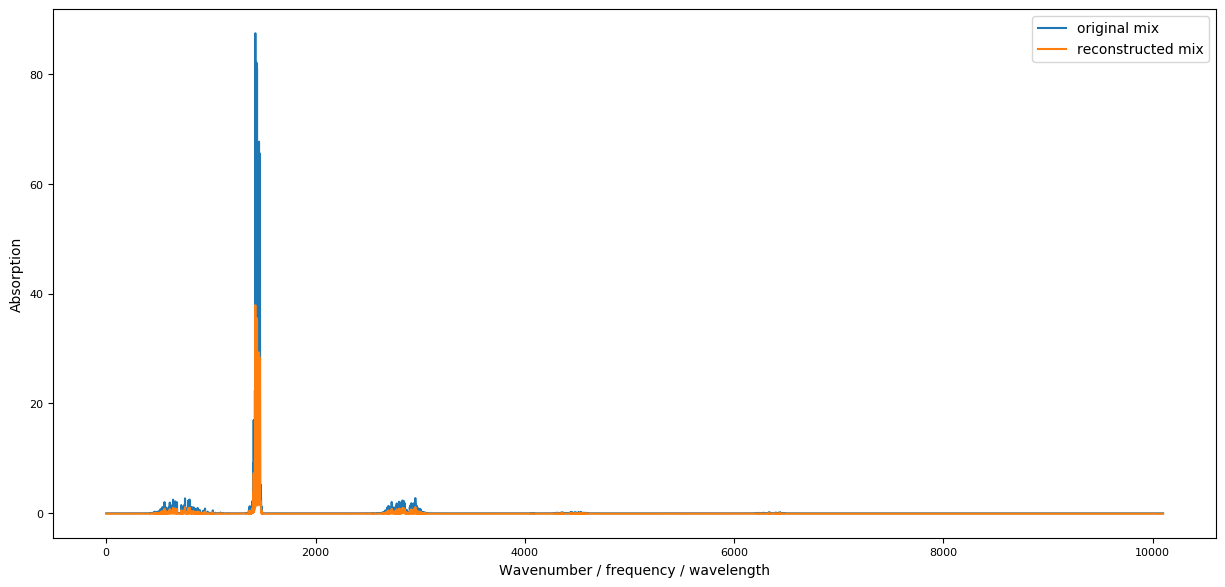

In [9]:
fig = plt.figure(figsize=(15, 7), dpi=100)
plt.ylabel('Absorption', fontsize=10)
plt.xlabel('Wavenumber / frequency / wavelength', fontsize=10)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.plot(range(0, len(mixes[0])), mixes[0], label = 'original mix')
plt.plot(range(0, len(cca_result[1])), cca_result[1], label = 'reconstructed mix')
plt.legend()
plt.show()